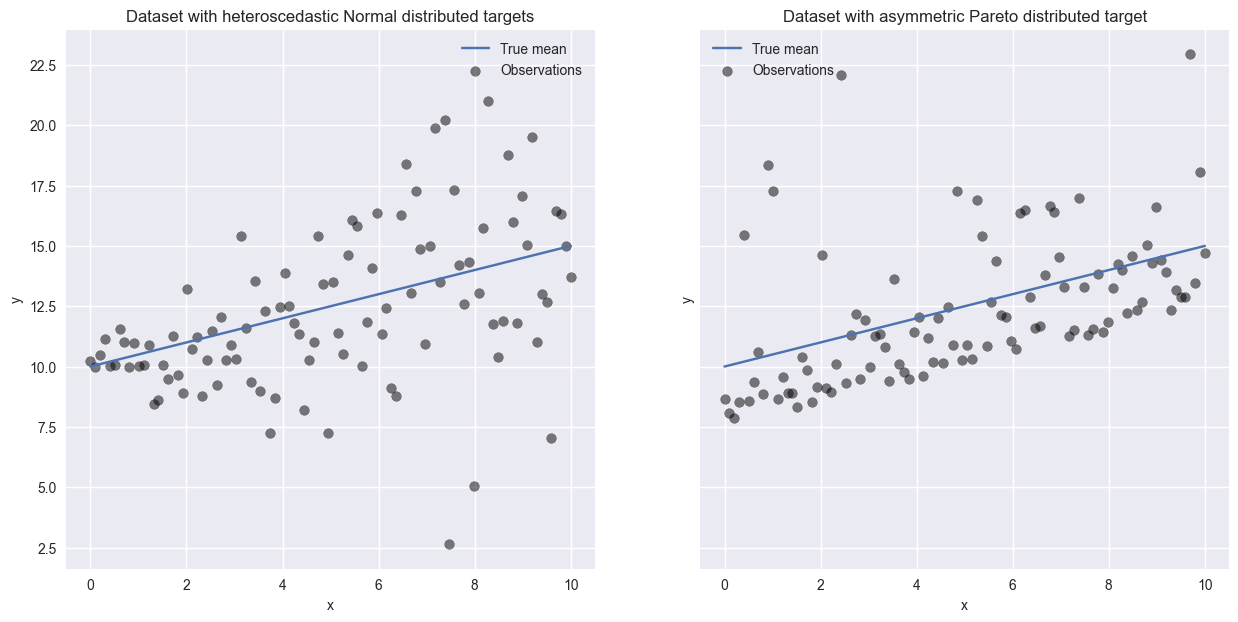

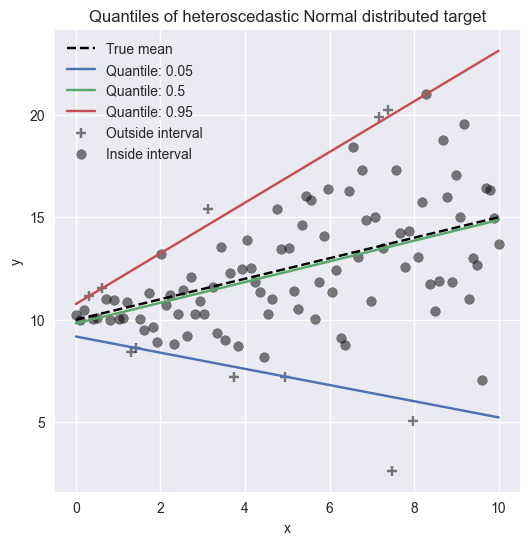

In [3]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap1\sourcecode")
# 导入基础计算库
import numpy as np
# 导入绘图库
import matplotlib.pyplot as plt
# 导入回归器
from sklearn.linear_model import QuantileRegressor
# 导入版本号
from sklearn.utils.fixes import sp_version, parse_version
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
# 生成数据
np.random.seed(42)
x = np.linspace(start=0, stop=10, num=100)
X = x[:, np.newaxis]
y_true_mean = 10 + 0.5 * x
# 添加异方差的正态误差
y_normal = y_true_mean + np.random.normal(
    loc=0, 
    scale=0.5 + 0.5 * x,
    size=x.shape[0]
)
# 添加非对称的帕累托误差
a = 5
y_pareto = y_true_mean + 10 * (np.random.pareto(
    a, size=x.shape[0]) - 1 / (a - 1)
)
# 开始绘图
fig1, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex="row", sharey="row")
# 第一幅图
axs[0].plot(x, y_true_mean, label="True mean")
axs[0].scatter(x, y_normal, color="black", alpha=0.5, label="Observations")
axs[0].set_title("Dataset with heteroscedastic Normal distributed targets")
axs[0].legend()
axs[0].set_ylabel("y")
axs[0].set_xlabel("x")
# 第二幅图
axs[1].plot(x, y_true_mean, label="True mean")
axs[1].scatter(x, y_pareto, color="black", alpha=0.5, label="Observations")
axs[1].set_title("Dataset with asymmetric Pareto distributed target")
axs[1].legend()
axs[1].set_ylabel("y")
axs[1].set_xlabel("x")
plt.show()
fig1.savefig("../codeimage/code31.pdf")

solver = "highs" if sp_version >= parse_version("1.6.0") else "interior-point"
# 分位点
quantiles = [0.05, 0.5, 0.95]
# 预测值容器
predictions = {}
# 离群值预测
out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)
for quantile in quantiles:
    # 建立模型
    qr = QuantileRegressor(
        quantile=quantile, 
        alpha=0, 
        solver=solver
    )
    # 模型拟合
    qr.fit(X, y_normal)
    # 预测
    y_pred = qr.predict(X)
    # 加入字典中
    predictions[quantile] = y_pred
    # 判断是否离群值
    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred >= y_normal
        )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred <= y_normal
        )
fig2, ax = plt.subplots(figsize=(6,6))
ax.plot(
    X, y_true_mean, 
    color="black", linestyle="dashed", 
    label="True mean"
)
# 预测直线
for quantile, y_pred in predictions.items():
    ax.plot(X, y_pred, label=f"Quantile: {quantile}")
# 散点图
ax.scatter(
    x[out_bounds_predictions],
    y_normal[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
# 散点
ax.scatter(
    x[~out_bounds_predictions],
    y_normal[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)
# 显示图例
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Quantiles of heteroscedastic Normal distributed target")
plt.show()
fig2.savefig("../codeimage/code32.pdf")
